<a href="https://colab.research.google.com/github/Donika1999/Machine-Learning-Algorithms/blob/master/LAB3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random
from mpl_toolkits import mplot3d
from google.colab import files
uploaded=files.upload()

import io
#a #not using lda
data1=pd.read_excel(io.BytesIO(uploaded['ex2data1.xls']))

Saving ex2data1.xls to ex2data1.xls


Text(0, 0.5, 'x2')

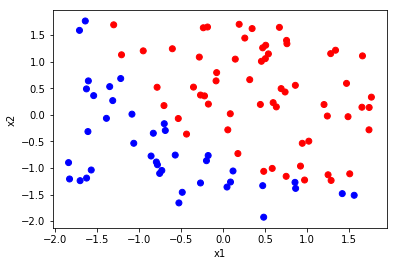

In [0]:
x1=np.array(data1['x1'])
x2=np.array(data1['x2'])
y=np.array(data1['y'])
x1=(x1-np.mean(x1))/np.std(x1)
x2=(x2-np.mean(x2))/np.std(x2)
m=len(x1)

c=['blue', 'red']
a=[]
for i in range(m):
  a.append(c[y[i]])

plt.scatter(x1,x2,c=a)
plt.xlabel('x1') 
plt.ylabel('x2') 

In [0]:
from sklearn.model_selection import train_test_split

X1=np.column_stack((x1,x2))

X=np.ones(shape=100, dtype='int')
X=X.reshape(100,1)
X=np.column_stack((X,X1))
#print(X)
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.1)

In [0]:
def logistic_func(beta, X): 
    return 1.0/(1 + np.exp(-np.dot(X, beta.T))) 

def log_gradient(beta, X, y): 
    first_calc = logistic_func(beta, X) - y.reshape(X.shape[0], -1) 
    final_calc = np.dot(first_calc.T, X) 
    return final_calc

In [0]:
def cost_func(beta, X, y): 
    log_func_v = logistic_func(beta, X) 
    y = np.squeeze(y) 
    step1 = y * np.log(log_func_v) 
    step2 = (1 - y) * np.log(1 - log_func_v) 
    final = -step1 - step2 
    return np.mean(final) 
  
  
def grad_desc(X, y, beta, lr=.01, converge_change=.001): 
    cost = cost_func(beta, X, y) 
    change_cost = 1
    num_iter = 1
      
    while(change_cost > converge_change): 
        old_cost = cost 
        beta = beta - (lr * log_gradient(beta, X, y)) 
        cost = cost_func(beta, X, y) 
        change_cost = old_cost - cost 
        num_iter += 1
      
    return beta, num_iter  
  
  
def pred_values(beta, X): 
    pred_prob = logistic_func(beta, X) 
    pred_value = np.where(pred_prob >= .5, 1, 0) 
    return np.squeeze(pred_value) 
  

In [0]:
def plot_reg(X, y, beta): 
    # labelled observations 
    x_0 = X[np.where(y == 0.0)] 
    x_1 = X[np.where(y == 1.0)] 
      
    # plotting points with diff color for diff label 
    plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0') 
    plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1') 
      
    # plotting decision boundary 
    x1 = np.arange(-2,2,0.5) 
    x2 = -(beta[0,0] + beta[0,1]*x1)/beta[0,2] 
    plt.plot(x1, x2, c='k', label='reg line') 
  
    plt.xlabel('x1') 
    plt.ylabel('x2') 
    plt.legend() 
    plt.show() 

In [0]:
beta = np.matrix(np.zeros(x_train.shape[1])) 
beta, num_iter = grad_desc(x_train, y_train, beta) 
y_pred = pred_values(beta, x_test) 

beta.shape`
print("Number of iterations: ",num_iter)
print("Correctly predicted labels:", np.sum(y_test == y_pred))
print("Accuracy of classification:",np.sum(y_test == y_pred)*10 )

Number of iterations:  260
Correctly predicted labels: 9
Accuracy of classification: 90


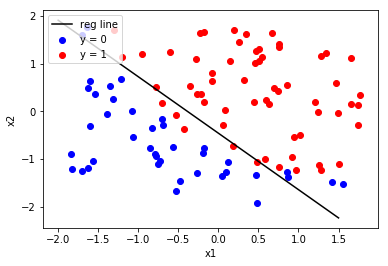

In [0]:
plot_reg(X, y, beta) 